# Implement KNN Classification  algorithm and evaluate model's accuracy.

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [3]:
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y)


In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [7]:
y_pred = knn.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy (k={k}): {acc:.2f}")


Model Accuracy (k=3): 0.92


In [8]:
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[12  0  0]
 [ 0 13  0]
 [ 0  3 10]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.81      1.00      0.90        13
           2       1.00      0.77      0.87        13

    accuracy                           0.92        38
   macro avg       0.94      0.92      0.92        38
weighted avg       0.94      0.92      0.92        38



In [9]:
cv_scores = cross_val_score(knn, scaler.transform(X), y, cv=5, scoring='accuracy')
print("\nCross-validation accuracies:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())


Cross-validation accuracies: [0.96666667 0.96666667 0.93333333 0.9        1.        ]
Mean CV Accuracy: 0.9533333333333334


In [10]:
param_grid = {'n_neighbors': np.arange(1, 21)}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid.fit(scaler.transform(X), y)
best_k = grid.best_params_['n_neighbors']
print(f"\nBest k found using GridSearchCV: {best_k}")
print(f"Best Cross-validation accuracy: {grid.best_score_:.3f}")


Best k found using GridSearchCV: 6
Best Cross-validation accuracy: 0.967


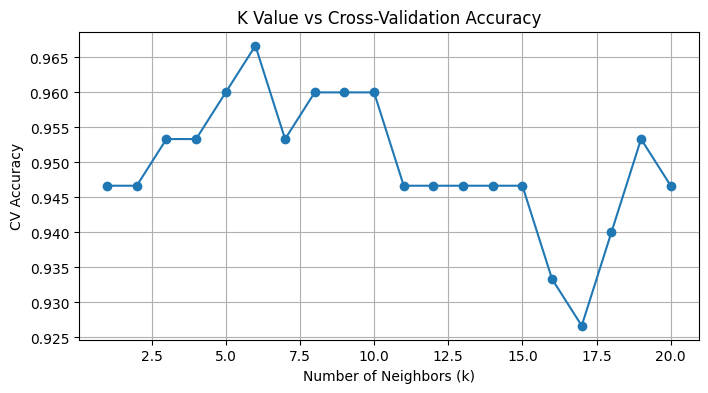

In [11]:
cv_means = []
for k in range(1, 21):
    scores = cross_val_score(KNeighborsClassifier(n_neighbors=k),
                             scaler.transform(X), y, cv=5, scoring='accuracy')
    cv_means.append(scores.mean())

plt.figure(figsize=(8,4))
plt.plot(range(1, 21), cv_means, marker='o', linestyle='-')
plt.title("K Value vs Cross-Validation Accuracy")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("CV Accuracy")
plt.grid(True)
plt.show()

In [12]:
final_knn = KNeighborsClassifier(n_neighbors=best_k)
final_knn.fit(X_train_scaled, y_train)
final_pred = final_knn.predict(X_test_scaled)
final_acc = accuracy_score(y_test, final_pred)
print(f"\nFinal Model Accuracy (k={best_k}): {final_acc:.2f}")


Final Model Accuracy (k=6): 0.92
